In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Loading the preprocessed iris dataset
file_path = Path("Resources/myopia_data_cleaned.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,-0.996769


In [3]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df_myopia)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [4]:
# Applying PCA to reduce dimensions 

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
#myopia_pca = pca.fit_transform(myopia_scaled)

pca.fit(myopia_scaled)
reduced = pca.transform(myopia_scaled)
myopia_pca = reduced

In [5]:
# Transform PCA data to a DataFrame
myopia_pca = pd.DataFrame(
    data=myopia_pca)
myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [7]:
file_path = 'Resources/myopia_data_cleaned.csv'

In [8]:
mycleaned_df = pd.read_csv(file_path)

In [9]:
mycleaned_df.sample(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,1.003241
493,-0.420219,-0.518074,-1.599168,-0.211242,1.817083,-1.984161,-1.124497,-0.259684,-0.689311,-0.221409,0.534052,-0.313246,0,-0.996769
571,-0.420219,-0.177499,-0.348415,0.483784,0.638282,-0.673220,0.257092,2.349828,1.930175,-0.221409,0.184058,2.058976,1,1.003241
35,-0.420219,-0.070369,0.931765,1.239625,-0.579382,0.652789,1.387483,-0.912062,1.602740,-0.672996,2.109022,0.560731,0,1.003241
495,-0.420219,0.460481,-1.334302,-2.287632,1.454375,-0.914313,-0.998898,0.392694,-0.689311,-0.672996,1.059042,0.061316,0,1.003241
361,-0.420219,0.161478,1.638075,0.249212,-1.512058,1.933592,-1.124497,-0.912062,0.292997,-0.672996,-0.865922,-0.999941,1,1.003241
354,-0.420219,-0.855452,0.225459,1.117995,-0.967997,0.080194,-1.375695,-0.585873,-0.361875,-0.221409,-1.390913,-1.062368,0,-0.996769
28,-0.420219,-0.209477,0.107741,0.318715,-1.408429,0.336355,-0.873299,-0.259684,-0.361875,-0.221409,-0.690926,-0.625380,1,1.003241
500,-0.420219,-0.858650,1.858795,0.422970,-0.773690,1.933592,2.266676,1.371261,-0.361875,-0.221409,0.534052,0.748011,1,-0.996769
528,-0.420219,0.633167,-0.892861,-0.324184,-0.190765,-0.748562,2.266676,0.066505,-0.689311,1.133351,1.934025,0.935292,0,1.003241


In [10]:
# Create a new dataframe for t-SNE
mycleaned_df = mycleaned_df.drop(['MOMMY'],axis =1)
labels = mycleaned_df

In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=45)

In [12]:
# Reduce dimensions
tsne_features = tsne.fit_transform(mycleaned_df)

In [13]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
mycleaned_df['x'] = tsne_features[:,0]

# The second column of transformed features
mycleaned_df['y'] = tsne_features[:,1]

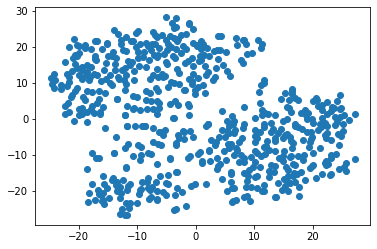

In [15]:
# Visualize the clusters
plt.scatter(mycleaned_df['x'], mycleaned_df['y'])
plt.show()

In [16]:
labels.value_counts()

AGE        SPHEQ      AL         ACD        LT         VCD        SPORTHR    READHR     COMPHR     STUDYHR    TVHR       DIOPTERHR  DADMY      x           y         
-1.823978  -1.487036   0.652187   1.117995  -1.874766   0.713062   1.010686  -0.912062  -0.689311  -0.672996  -0.865922  -1.374503  -0.996769  -24.791821   11.332391    1
-0.420219   0.896993  -1.025294  -0.732511   3.695392  -1.667727   0.382691  -0.912062  -0.034439  -0.672996  -0.515929  -0.999941  -0.996769   4.231749    23.084589    1
            0.849025  -1.084152  -1.653421   0.819635  -0.733493   1.010686   0.066505  -0.034439  -0.221409   0.184058  -0.001111  -0.996769   2.020466    12.949463    1
            0.852223  -0.995864  -0.619569   0.456927  -0.914313  -0.496502  -0.259684  -0.361875   0.230178  -1.040919  -0.562953   1.003241   23.087660   2.104924     1
            0.861817  -1.908176  -1.080025  -1.784090  -1.170474   1.010686  -0.912062  -0.361875  -0.672996   0.184058  -0.875088   1.003241   25.708

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not           AGE     SPHEQ        AL       ACD        LT       VCD   SPORTHR  \
0   -0.420219 -1.363917 -0.892861  0.483784 -0.281443 -1.019792  4.150661   
1   -0.420219 -0.308612 -0.171840  0.535910 -0.967997 -0.130763 -0.998898   
2   -0.420219  0.604386 -0.009977 -0.506628 -0.177812  0.215809  0.257092   
3   -0.420219 -0.441325 -0.436703  1.230936  0.456927 -0.974587  0.759488   
4   -1.823978 -0.166306  1.167204  0.422970 -0.566427  1.180178  0.257092   
..        ...       ...       ...       ...       ...       ...       ...   
613 -0.420219 -0.196686 -0.142410  0.366499  1.694021 -0.673220 -1.250096   
614 -0.420219 -0.217472  0.004738 -0.037486 -1.058674  0.276082 -0.747700   
615 -0.420219  1.651696  0.652187  0.197086 -0.760735  0.773335 -0.496502   
616 -0.420219 -0.217472 -0.848716  0.475096  0.366251 -1.110201  0.005894   
617 -0.420219  0.001583 -0.348415 -0.211242 -0.372120 -0.191036  1.638681   

       READHR    COMPHR   STUDYHR      TVHR  DIOPTERHR     DADMY          x  \
0    1.697450 -0.689311 -0.672996  0.184058   0.498304  1.003241  -3.634724   
1   -0.912062 -0.361875 -0.221409 -0.340932  -0.875088  1.003241  17.291130   
2   -0.912062 -0.034439 -0.672996  0.184058  -0.750234 -0.996769 -12.254970   
3    2.676017 -0.689311 -0.672996 -0.865922   0.685585  1.003241   0.783457   
4   -0.912062 -0.689311 -0.672996 -0.865922  -1.374503 -0.996769 -24.110157   
..        ...       ...       ...       ...        ...       ...        ...   
613 -0.912062  1.602740  0.681765  0.884045   0.685585 -0.996769  -9.618381   
614 -0.912062 -0.361875 -0.672996 -0.165935  -0.999941  1.003241  16.797295   
615 -0.912062 -0.689311 -0.672996 -0.865922  -1.374503  1.003241  20.553598   
616 -0.259684 -0.361875 -0.672996  1.059042  -0.188392 -0.996769  -5.822700   
617 -0.912062 -0.034439 -0.672996  0.184058  -0.750234  1.003241  23.003666   

             y  
0     0.111060  
1   -15.350159  
2    10.728942  
3    -9.070052  
4    10.782752  
..         ...  
613  14.709746  
614 -15.003436  
615 -16.305103  
616  12.364961  
617 -10.769662  

[618 rows x 15 columns]

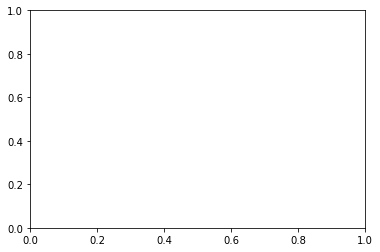

In [17]:
# Visualize the clusters with color
plt.scatter(mycleaned_df['x'], mycleaned_df['y'],c = labels)
plt.show()

In [ ]:
plt.scatter(df_myopia['AL'], df_myopia['TVHR'],c=labels 
plt.show()